Week 1 - Lecture Notes

Lectura 1: Polynomial Curve Fitting

Para atacar el problema de tener un conjunto finito de N Datos $(x_n,t_n)$ y buscar una curva polinomial que se ajuste a estos, es necesario
aproximarse por medio de la descripción de un polinomio de grado finito M; a saber:

$y(x,w)=w_0 + w_1x + w_2x^2 + ... + w_{M}x^{X} = \sum_{j=0}^{M} w_{j}x^{j}$

Donde los valores de $W$ se obtienen minimizando la función de error:

$E(w) = \frac{1}{2}\sum_{n=1}^{N}(y(x_{n},w) - t_n)^2$

Root-Mean-Square:
$E_{RMS}=\sqrt{2E(w^*)/N}$

In [1]:
import numpy as np

In [2]:
import matplotlib.pylab as plt

In [3]:
t=np.loadtxt("numeros_20.txt")

In [4]:
y=t[:,1]

In [5]:
x=t[:,0]

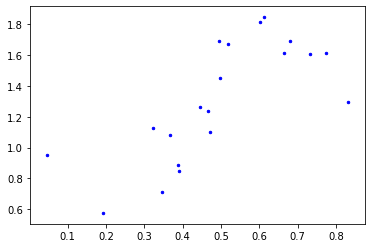

In [6]:
plt.scatter(t[:,0],t[:,1],color='blue',s=6)

In [7]:
y

array([1.29751152, 0.84837905, 1.69092202, 1.67281645, 1.61348161,
       1.45261521, 1.07887244, 1.12770859, 1.61335803, 1.26503217,
       1.10169943, 0.95327334, 1.69306114, 1.81298979, 1.84597808,
       0.70988262, 1.60400162, 0.88365941, 0.57513292, 1.23855617])

In [8]:
def Coef(x,M):
    A=[]
    for i in range(len(x)):
        B=[]
        for j in range(M+1):
            B.append(x[i]**j)
        A.append(B)
    return A

In [9]:
S=np.array(Coef(x,3))
print(S)

[[1.00000000e+00 8.32532598e-01 6.93110527e-01 5.77037108e-01]
 [1.00000000e+00 3.90884986e-01 1.52791073e-01 5.97237364e-02]
 [1.00000000e+00 4.95428321e-01 2.45449221e-01 1.21602496e-01]
 [1.00000000e+00 5.17825564e-01 2.68143315e-01 1.38851463e-01]
 [1.00000000e+00 7.73952402e-01 5.99002321e-01 4.63599286e-01]
 [1.00000000e+00 4.96645468e-01 2.46656721e-01 1.22500943e-01]
 [1.00000000e+00 3.66810546e-01 1.34549976e-01 4.93543503e-02]
 [1.00000000e+00 3.23458577e-01 1.04625451e-01 3.38419996e-02]
 [1.00000000e+00 6.65301417e-01 4.42625975e-01 2.94479688e-01]
 [1.00000000e+00 4.44687530e-01 1.97747000e-01 8.79356248e-02]
 [1.00000000e+00 4.71800856e-01 2.22596048e-01 1.05021006e-01]
 [1.00000000e+00 4.56748519e-02 2.08619210e-03 9.52865152e-05]
 [1.00000000e+00 6.79806699e-01 4.62137148e-01 3.14163929e-01]
 [1.00000000e+00 6.01143883e-01 3.61373968e-01 2.17237750e-01]
 [1.00000000e+00 6.13284724e-01 3.76118152e-01 2.30667517e-01]
 [1.00000000e+00 3.46915001e-01 1.20350018e-01 4.175122

In [10]:
S1=np.linalg.pinv(S)
print(S1)

[[-2.26896429e-01 -1.22857543e-01 -8.36416799e-03  2.21928539e-02
  -4.00459470e-03 -6.70567937e-03 -1.33642400e-01 -1.28662419e-01
   1.43963188e-01 -7.35722188e-02 -3.99905139e-02  1.24166327e+00
   1.40137533e-01  1.18833374e-01  1.28040795e-01 -1.35648247e-01
   9.00030681e-02 -1.24020463e-01  1.66701566e-01 -4.71709666e-02]
 [ 3.87966230e+00  2.02947568e+00 -3.26484242e-01 -8.25360193e-01
   3.21712029e-01 -3.54317073e-01  2.46366436e+00  3.01990998e+00
  -2.37180255e+00  8.60357205e-01  2.23625430e-01 -7.85710776e+00
  -2.25457003e+00 -2.20863255e+00 -2.31450538e+00  2.75999798e+00
  -1.27601517e+00  2.06674991e+00  1.80923607e+00  3.54404006e-01]
 [-1.28078652e+01 -4.97819895e+00  2.14602860e+00  3.55930422e+00
  -1.78310776e+00  2.22571837e+00 -6.42241416e+00 -8.49430025e+00
   7.17281302e+00 -1.33965013e+00  5.51788976e-01  1.54047209e+01
   6.69841221e+00  7.20143966e+00  7.42630853e+00 -7.47170583e+00
   3.33547655e+00 -5.09932325e+00 -7.49289357e+00  1.67448052e-01]
 [ 1.13

In [11]:
c=np.dot(S1,y)
print(c)

[  1.26264805  -7.9664384   27.30330289 -21.31548334]


In [12]:
def f(x,c):
    suma=0
    for i in range(len(c)):
        y=c[i]*(x**i)
        suma+=y
    return suma

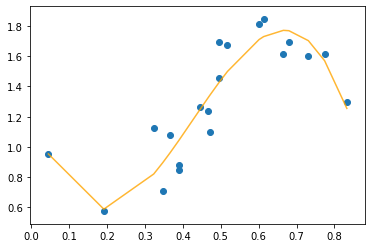

In [13]:
plt.plot(np.sort(x),f(np.sort(x),c),alpha=0.8,color="orange")
plt.scatter(x,y)

In [38]:
def AproxFit(x,y,M):
    #Creación de la Matriz de coeficientes
    def Coef(x,M):
        A=[]
        for i in range(len(x)):
            B=[]
            for j in range(M+1):
                B.append(x[i]**(j))
            A.append(B)
        return A
    
    #Declaración de las Matrices para el producto matricial
    S=np.array(Coef(x,M))
    S1=np.linalg.pinv(S)
    c=np.dot(S1,y)
    
    #Construcción de la Función
    def f(x,c):
        suma=0
        for i in range(len(c)):
            y=c[i]*(x**i)
            suma+=y
        return suma
    
    #Graficas de los elementos
    print(c)
    xmin=np.min(x)
    xmax=np.max(x)
    x1=np.linspace(xmin,xmax,100)
    plt.plot(x1,f(x1,c),alpha=0.8,color="orange")
    #plt.scatter(x,y)

[ 0.47170595  2.09872661 -0.72106585]


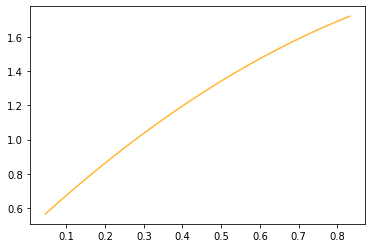

In [39]:
AproxFit(x,y,2)

[  1.26264805  -7.9664384   27.30330289 -21.31548334]


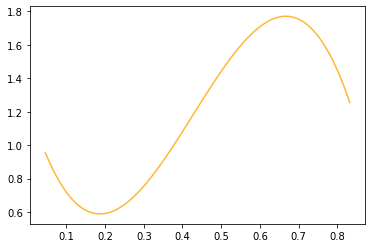

In [40]:
AproxFit(x,y,3)

[  1.3133651   -9.05565047  32.40868219 -29.90777892   4.7721243 ]


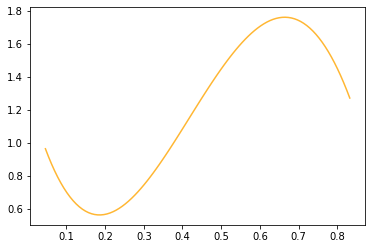

In [41]:
AproxFit(x,y,4)

[ 9.90862659e-01  1.37325245e-01 -3.13890413e+01  1.48506447e+02
 -2.13289880e+02  9.68677065e+01]


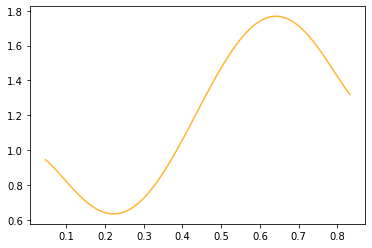

In [42]:
AproxFit(x,y,5)

[ 1.13313572e+02 -4.65824999e+03  6.66689678e+04 -4.94990944e+05
  2.21948053e+06 -6.43719967e+06  1.23994167e+07 -1.57898509e+07
  1.27855093e+07 -5.96402517e+06  1.21992772e+06]


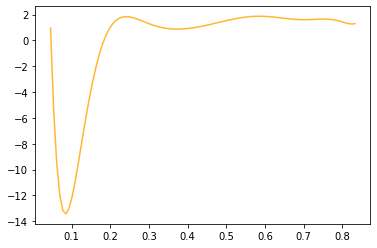

In [43]:
AproxFit(x,y,10)

[ 6.64366982e+05 -3.22934539e+07  5.98532750e+08 -6.04246714e+09
  3.80222867e+10 -1.58029806e+11  4.39415509e+11 -7.87573561e+11
  7.74401888e+11 -7.43933576e+10 -6.63729455e+11  3.35206664e+11
  5.66810578e+11 -3.49156597e+11 -5.83451880e+11  2.78010032e+11
  6.48946212e+11 -2.46822124e+11 -7.33421404e+11  7.19595723e+11
 -1.98384138e+11]


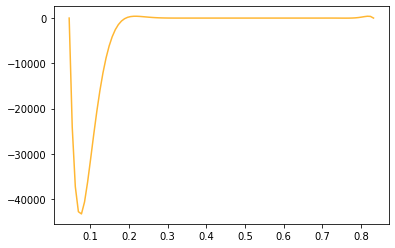

In [44]:
AproxFit(x,y,20)

[1.30394658]


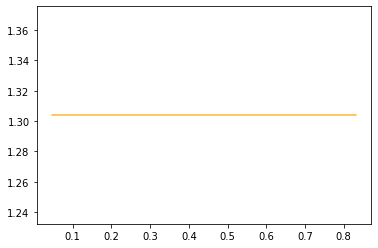

In [45]:
AproxFit(x,y,0)

[0.6016945  1.42670223]


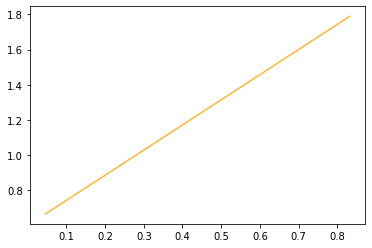

In [46]:
AproxFit(x,y,1)

[1.30394658]
[0.6016945  1.42670223]
[ 0.47170595  2.09872661 -0.72106585]
[  1.26264805  -7.9664384   27.30330289 -21.31548334]
[  1.3133651   -9.05565047  32.40868219 -29.90777892   4.7721243 ]
[ 9.90862659e-01  1.37325245e-01 -3.13890413e+01  1.48506447e+02
 -2.13289880e+02  9.68677065e+01]


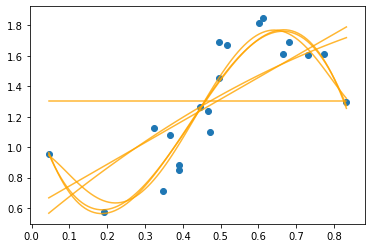

In [47]:
plt.scatter(x,y)
for i in range(6):
    AproxFit(x,y,i)

In [24]:
def AproxFit2(x,y,M):
    #Creación de la Matriz de coeficientes
    def Coef(x,M):
        A=[]
        for i in range(len(x)):
            B=[]
            for j in range(M+1):
                B.append(x[i]**j)
            A.append(B)
        return A
    
    #Declaración de las Matrices para el producto matricial
    S=np.array(Coef(x,M))
    S1=np.linalg.pinv(S)
    c=np.dot(S1,y)
    
    #Construcción de la Función
    def f(x,c):
        suma=0
        for i in range(len(c)):
            y=c[i]*(x**i)
            suma+=y
        return suma
    
    #Graficas de los elementos
    print(c)
    xmin=np.min(x)
    xmax=np.max(x)
    x1=np.linspace(xmin,xmax,100)
    plt.plot(x1,f(x1,c),alpha=0.8,color="orange")
    #plt.scatter(x,y)

In [25]:
 #Construcción de la Función
def f(x,c):
    suma=0
    for i in range(len(c)):
        y=c[i]*(x**i)
        suma+=y
    return suma
    
#Graficas de los elementos
xmin=np.min(x)
xmax=np.max(x)
x1=np.linspace(xmin,xmax,100)

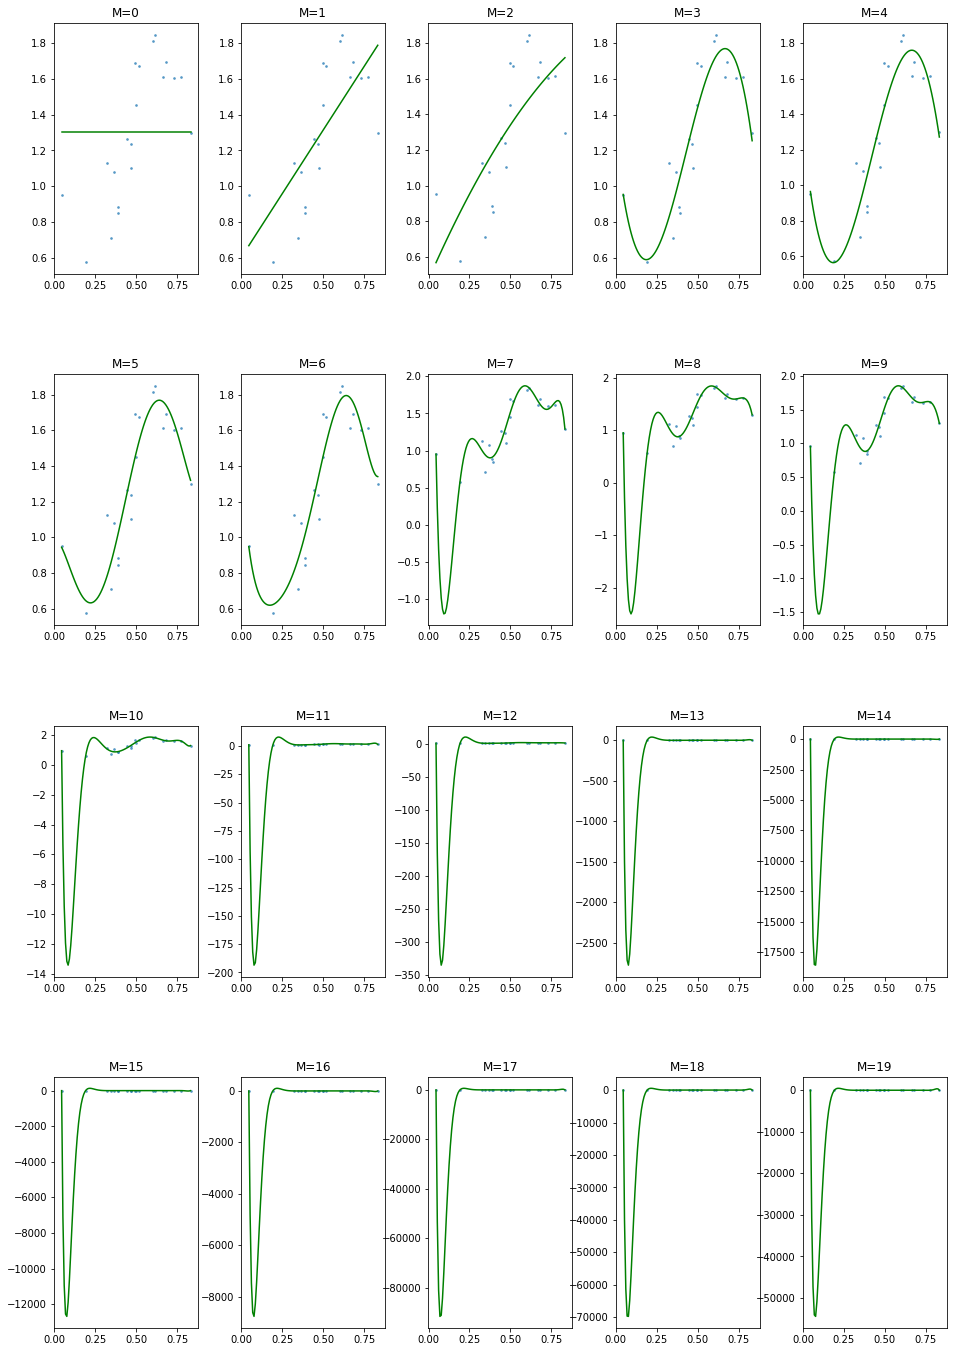

In [26]:
fig, axs = plt.subplots(4,5, figsize=(16, 24), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .4, wspace=.3)
axs=axs.ravel()
for i in range(20):
    axs[i].set_title("M=" + str(i))
    axs[i].scatter(x,y,alpha=0.6,s=3)
    c=AproxFit2(x,y,i)
    axs[i].plot(x1,f(x1,c),color='green')
plt.savefig('solucion.png')

[ 6.64366982e+05 -3.22934539e+07  5.98532750e+08 -6.04246714e+09
  3.80222867e+10 -1.58029806e+11  4.39415509e+11 -7.87573561e+11
  7.74401888e+11 -7.43933576e+10 -6.63729455e+11  3.35206664e+11
  5.66810578e+11 -3.49156597e+11 -5.83451880e+11  2.78010032e+11
  6.48946212e+11 -2.46822124e+11 -7.33421404e+11  7.19595723e+11
 -1.98384138e+11]


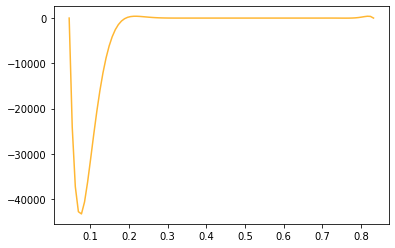

In [27]:
AproxFit(x,y,20)

In [50]:
x[:2]

array([0.8325326 , 0.39088499])

In [52]:
c=AproxFit2(x[:2],y[:2],1)

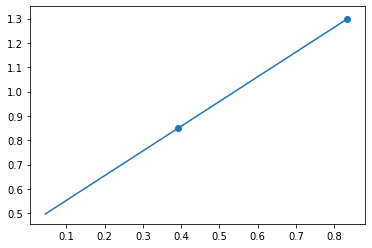

In [54]:
plt.plot(x1,f(x1,c))
plt.scatter(x[:2],y[:2])

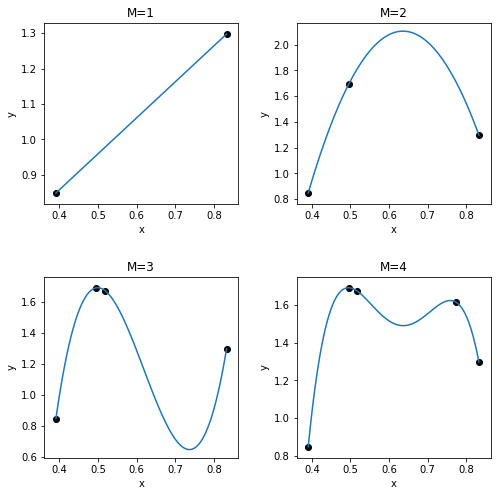

In [63]:
fig, axs = plt.subplots(2,2, figsize=(8, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .4, wspace=.3)
axs=axs.ravel()

for i in range(4):
    xl=x[:i+2]
    yl=y[:i+2]
    c=AproxFit2(xl,yl,i+1)
    xm=np.linspace(np.min(xl),np.max(xl),100)
    axs[i].set_title("M=" + str(i+1))
    axs[i].plot(xm,f(xm,c))
    axs[i].scatter(xl,yl,color='black')
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('y')